Running Python3.12.0 Kernel

In [64]:
# Setup

import pandas as pd
from ucimlrepo import fetch_ucirepo

# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.copy_on_write = True

# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336)

In [65]:
# Print dataset description for debug
# print(chronic_kidney_disease.metadata.additional_info.summary)

# Make pandas dataframes
features_df = chronic_kidney_disease.data.features
targets_df = chronic_kidney_disease.data.targets

Removing unwanted variables and combining the dataframes

In [66]:
# Merge dataframes
ckd_df = pd.merge(features_df, targets_df, left_index=True, right_index=True)

# Drop unwanted variables.
ckd_df = ckd_df.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

Cleaning and clarifying the data

In [67]:
# Rename variables in ckd_df
ckd_df = ckd_df.rename(columns={'age': 'Age', 'bp': 'BloodPressure', 'sg': 'SpecificGravity', 'al': 'Albumin', 'su': 'Sugar', 'bgr': 'BloodGlucoseRandom', 'bu': 'BloodUrea', 'sod': 'Sodium', 'pot': 'Potassium', 'hemo': 'Hemoglobin', 'pcv': 'PackedCellVolume', 'wbcc': 'WhiteBloodCellCount', 'rbcc': 'RedBloodCellCount', 'class': 'Class'})

# Hemoglobin to g/l from g/dl
ckd_df['Hemoglobin'] = ckd_df['Hemoglobin'] * 10

# Class to a/c (affected or control)
ckd_df['Class'] = ckd_df['Class'].map({'ckd': 'a', 'notckd': 'c'})

# Remove rows with too much missing data
ckd_df = ckd_df.dropna(thresh=11)


Split dataframe into affected and control individuals

In [74]:
# Split dataframe
affected_df = ckd_df.groupby('Class').get_group('a')
control_df = ckd_df.groupby('Class').get_group('c')

Displaying both dataframes

In [83]:
affected_df

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,BloodGlucoseRandom,BloodUrea,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,96.0,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
245,48.0,100.0,NaN,NaN,NaN,103.0,79.0,135.0,6.3,63.0,19.0,7200.0,2.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


In [84]:
control_df

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,BloodGlucoseRandom,BloodUrea,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [85]:
print("Number of rows in affected_df:", affected_df.shape[0])
print("Number of rows in control_df:", control_df.shape[0])

Number of rows in affected_df: 152
Number of rows in control_df: 144


Basic statistics of each dataframe

In [92]:
affected_df.describe()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,BloodGlucoseRandom,BloodUrea,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount
count,149.000000,149.000000,145.000000,145.000000,145.000000,142.000000,150.000000,122.000000,122.000000,151.000000,146.000000,132.000000,119.000000
mean,55.704698,80.738255,1.013966,1.813793,0.820690,180.823944,76.287333,134.073770,4.737705,106.410596,32.698630,9065.151515,3.957143
std,15.610765,16.069694,0.004710,1.409227,1.377745,95.841351,57.652606,7.446967,3.958615,21.983409,7.189427,3664.373244,0.857230
min,4.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2200.000000,2.100000
25%,48.000000,70.000000,1.010000,0.000000,0.000000,107.000000,36.000000,132.000000,3.900000,95.000000,29.000000,6775.000000,3.400000
50%,59.000000,80.000000,1.015000,2.000000,0.000000,149.000000,55.500000,136.000000,4.250000,109.000000,33.000000,8900.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,240.500000,98.000000,139.000000,4.900000,120.000000,37.000000,10550.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,147.000000,47.000000,161.000000,52.000000,26400.000000,8.000000


In [93]:
control_df.describe()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,BloodGlucoseRandom,BloodUrea,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount
count,144.000000,142.000000,140.000000,140.0,140.0,140.000000,140.000000,141.000000,141.000000,141.000000,143.000000,140.000000,140.000000
mean,46.597222,71.267606,1.022464,0.0,0.0,107.571429,32.921429,141.744681,4.330496,151.815603,46.300699,7677.142857,5.387143
std,15.790729,8.576659,0.002509,0.0,0.0,18.586041,11.330908,4.797923,0.590634,12.782579,4.128286,1839.429958,0.594682
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,24.000000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.500000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.250000,44.000000,146.000000,4.900000,161.000000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,178.000000,54.000000,11000.000000,6.500000


Histograms of both dataframes

Affected


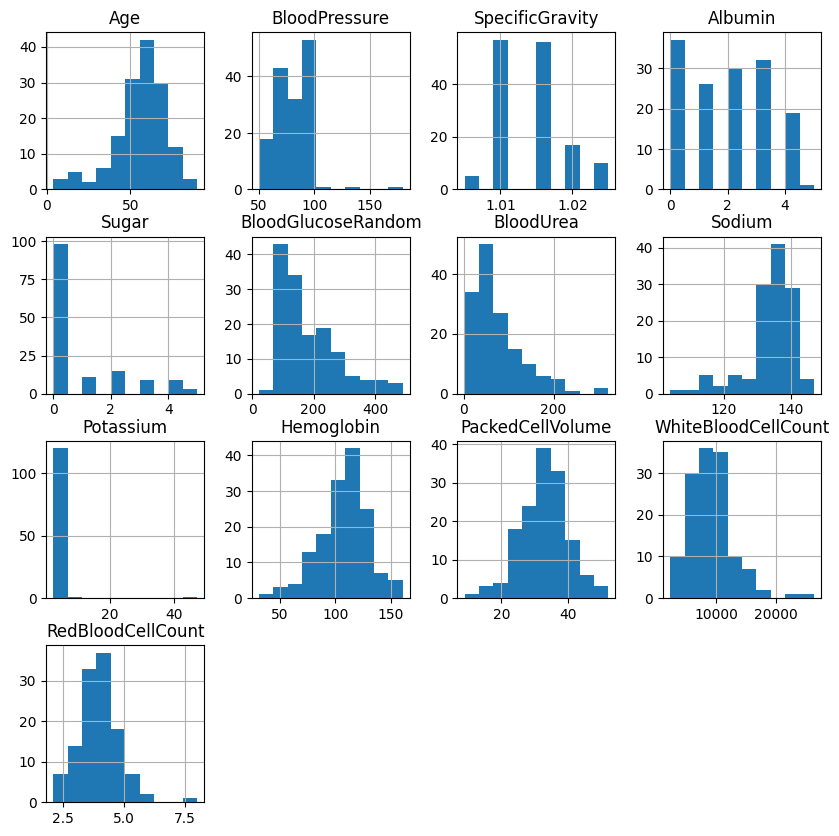

Control


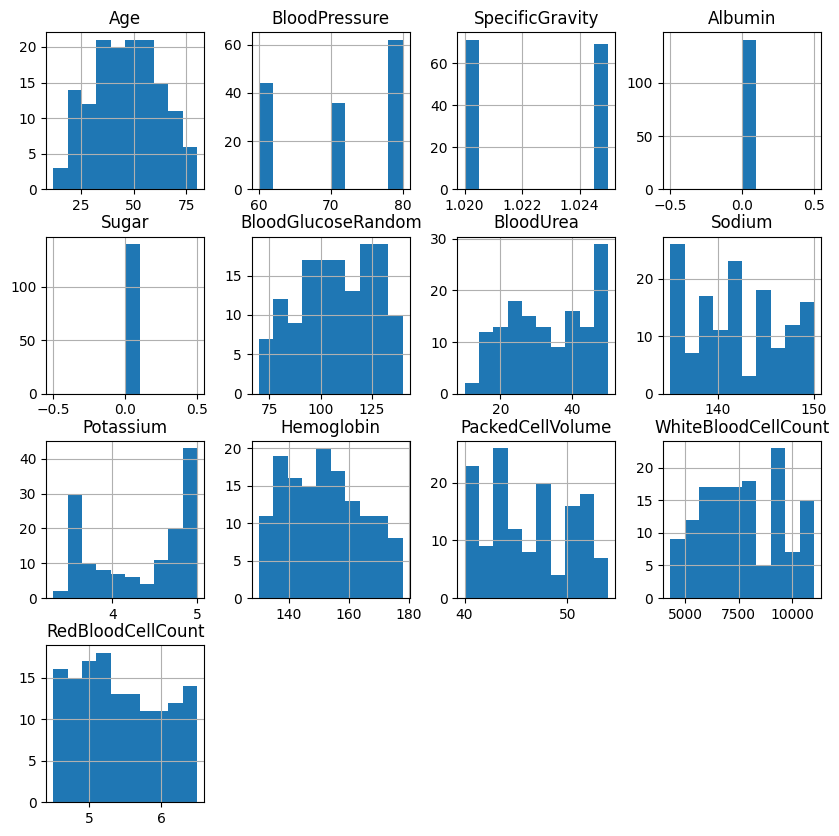

In [96]:
import matplotlib.pyplot as plt

# Draw histograms for each numerical column of both dataframes
print('Affected')
affected_df.hist(figsize=(10, 10))
plt.show()

print('Control')
control_df.hist(figsize=(10, 10))
plt.show()

Correlation matrix of the data

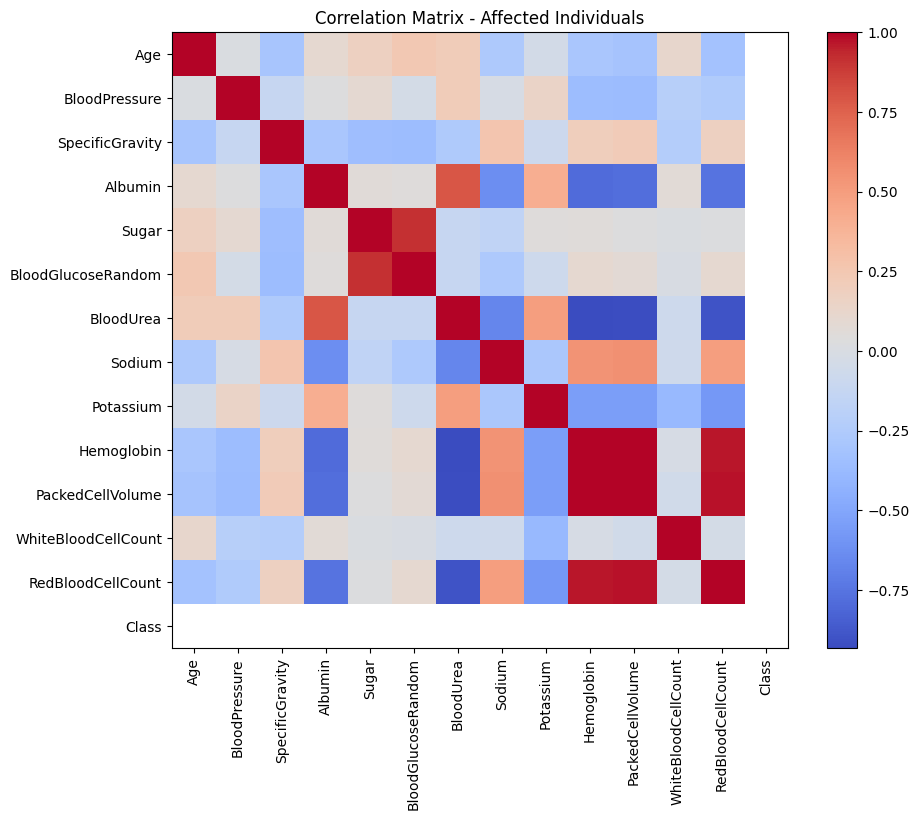

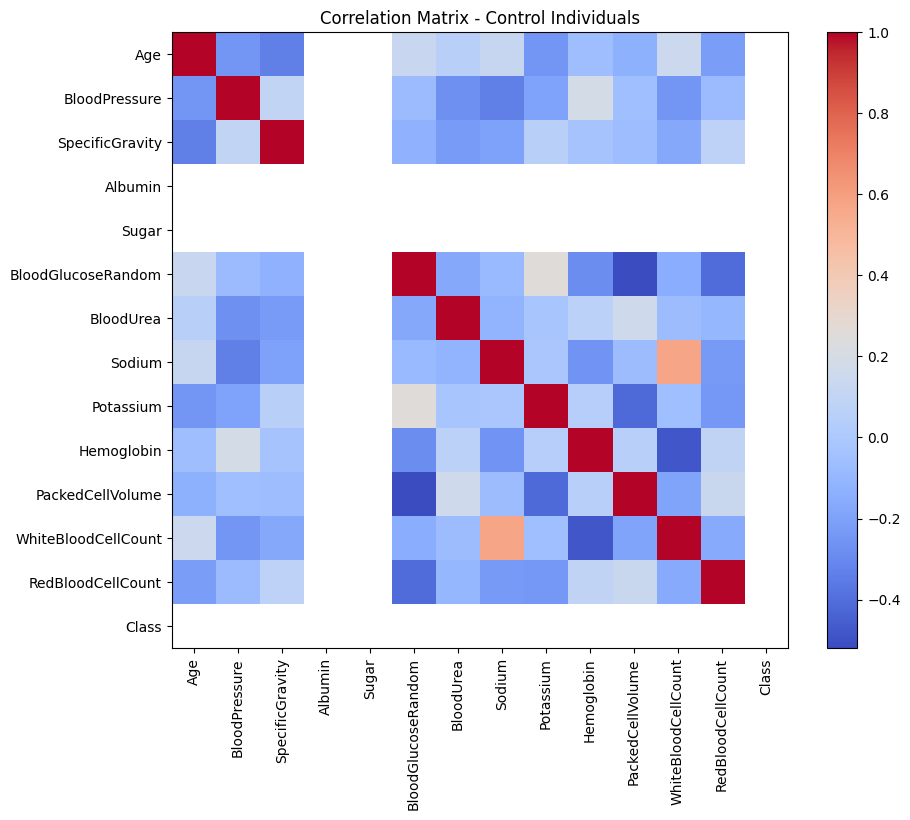

In [101]:
# Calculate correlation matrix
affected_corr_matrix = affected_corr.corr()
control_corr_matrix = control_corr.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix - Affected Individuals')
plt.imshow(affected_corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(affected_corr_matrix.columns)), affected_corr_matrix.columns, rotation=90)
plt.yticks(range(len(affected_corr_matrix.columns)), affected_corr_matrix.columns)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix - Control Individuals')
plt.imshow(control_corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(control_corr_matrix.columns)), control_corr_matrix.columns, rotation=90)
plt.yticks(range(len(control_corr_matrix.columns)), control_corr_matrix.columns)
plt.show()